#**Problem 3**

In this problem you have to work with the CIFAR10 data set. Check out the notebook [cifar10_data_set](https://colab.research.google.com/drive/1LZZviWOzvchcXRdZi2IBx3KOpQOzLalf) to see how to load it.

Give three convolutional models that 

- first model underfits
- second model overfits
- third model is pretty good

Make sure that you plot the curves depicting the training/validation accuracy/loss.

In [0]:
# Import libraries
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 21s 0us/step


In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_images = train_images / 255.0
test_images = test_images / 255.0

## Helper Functions

In [0]:
def plot_loss(epochs, train_loss, test_loss):
  plt.plot(epochs, train_loss, 'bo', label='Training loss')
  plt.plot(epochs, test_loss, 'ro', label='Test loss')
  plt.title('Training and test loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def plot_accuracy(epochs, train_acc, test_acc):
  plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
  plt.plot(epochs, test_acc, 'ro', label='Test accuracy')
  plt.title('Training and test accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

## Overfitting Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(128, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
epochs = 20

history = model.fit(train_images,
          train_labels,
          epochs=epochs,
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 289us/sample - loss: 1.4933 - acc: 0.4707 - val_loss: 1.1325 - val_acc: 0.6111
Epoch 2/20
50000/50000 [==============================] - 11s 217us/sample - loss: 1.0133 - acc: 0.6515 - val_loss: 1.4200 - val_acc: 0.5773
Epoch 3/20
50000/50000 [==============================] - 11s 221us/sample - loss: 0.8824 - acc: 0.7045 - val_loss: 0.9918 - val_acc: 0.6648
Epoch 4/20
50000/50000 [==============================] - 11s 221us/sample - loss: 0.8309 - acc: 0.7275 - val_loss: 1.0963 - val_acc: 0.6194
Epoch 5/20
50000/50000 [==============================] - 11s 217us/sample - loss: 0.7838 - acc: 0.7439 - val_loss: 1.0506 - val_acc: 0.6819
Epoch 6/20
50000/50000 [==============================] - 11s 215us/sample - loss: 0.7540 - acc: 0.7547 - val_loss: 1.0369 - val_acc: 0.6727
Epoch 7/20
50000/50000 [==============================] - 11s 218us/sample - loss: 0.7200 - acc: 0.7655 

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 97us/sample - loss: 1.3323 - acc: 0.7203
Test accuracy: 0.7203


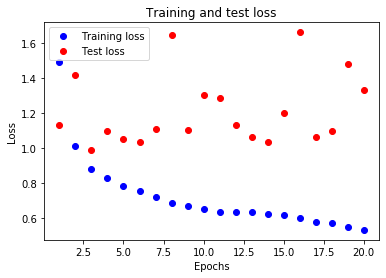

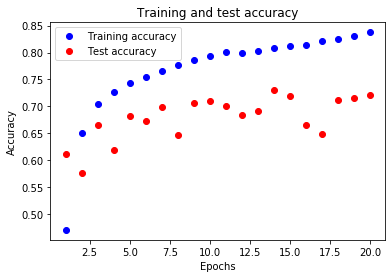

In [0]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['acc'], history_dict['val_acc'])

## Underfitting Model

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(128, 3, activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
epochs = 20

history = model.fit(train_images,
          train_labels,
          epochs=epochs,
          validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 7s 138us/sample - loss: 2.3033 - acc: 0.0971 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 7s 134us/sample - loss: 2.3029 - acc: 0.0987 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 7s 134us/sample - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 7s 135us/sample - loss: 2.3028 - acc: 0.0984 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 7s 132us/sample - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 7s 133us/sample - loss: 2.3027 - acc: 0.1000 - val_loss: 2.3027 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 7s 132us/sample - loss: 2.3028 - acc: 0.0985 - val_l

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 78us/sample - loss: 2.3027 - acc: 0.1000
Test accuracy: 0.1


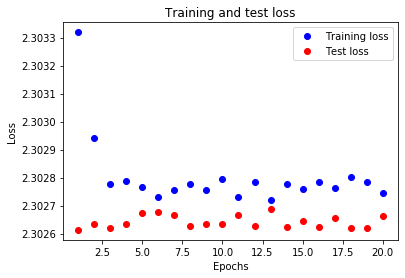

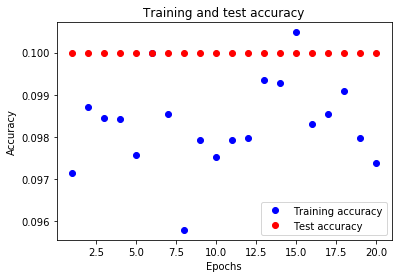

In [0]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['acc'], history_dict['val_acc'])

## Pretty Good Model

For this model, I used [this](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/) for reference. I was a little lost as to how to make a good model and getting the format & MaxPooling2D to work properly was thanks to this

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(128, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.Conv2D(256, (3, 3), activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
             metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
epochs = 20

history = model.fit(train_images,
          tf.keras.utils.to_categorical(train_labels),
          epochs=epochs,
          validation_data=(test_images, tf.keras.utils.to_categorical(test_labels)))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 670us/sample - loss: 1.6229 - acc: 0.4109 - val_loss: 1.6571 - val_acc: 0.4507
Epoch 2/20
50000/50000 [==============================] - 27s 550us/sample - loss: 1.1649 - acc: 0.5942 - val_loss: 1.5671 - val_acc: 0.5368
Epoch 3/20
50000/50000 [==============================] - 28s 552us/sample - loss: 1.0195 - acc: 0.6533 - val_loss: 0.8915 - val_acc: 0.6954
Epoch 4/20
50000/50000 [==============================] - 28s 551us/sample - loss: 0.9808 - acc: 0.6713 - val_loss: 0.9435 - val_acc: 0.6794
Epoch 5/20
50000/50000 [==============================] - 27s 548us/sample - loss: 0.9683 - acc: 0.6804 - val_loss: 1.1739 - val_acc: 0.6702
Epoch 6/20
50000/50000 [==============================] - 27s 547us/sample - loss: 0.9578 - acc: 0.6871 - val_loss: 0.8481 - val_acc: 0.7144
Epoch 7/20
50000/50000 [==============================] - 28s 552us/sample - loss: 0.9466 - acc: 0.6928 

In [0]:
test_loss, test_acc = model.evaluate(test_images, tf.keras.utils.to_categorical(test_labels))

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 2s 191us/sample - loss: 1.0006 - acc: 0.7044
Test accuracy: 0.7044


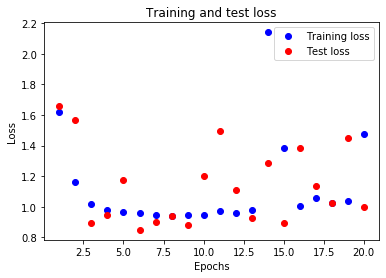

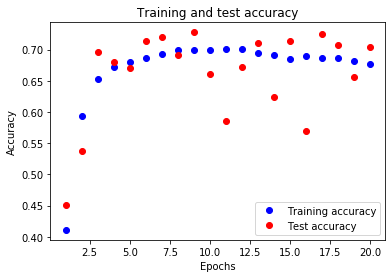

In [0]:
history_dict = history.history
epochs_range = range(1, epochs+1)

plot_loss(epochs_range, history_dict['loss'], history_dict['val_loss'])
plot_accuracy(epochs_range, history_dict['acc'], history_dict['val_acc'])